# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de GridSearch con el fin de buscar los mejores hiperparámetros de distintos modelos dentro de un rango de valores definidos por nosotros mismos. Igualmente, se busca que usted aplique y comprenda los siguientes modelos:

- Árboles de decisión
- Bosques de decisión
- AdaBoost
- XGBoost
- Bagging

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import missingno as msn

Lectura de CSV y borrado de filas incompletas.

In [ ]:
# cargar bases
# quitar na's de las observaciones
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


En la gráfica siguiente se puede observar que no hay valores perdidos.

<AxesSubplot:>

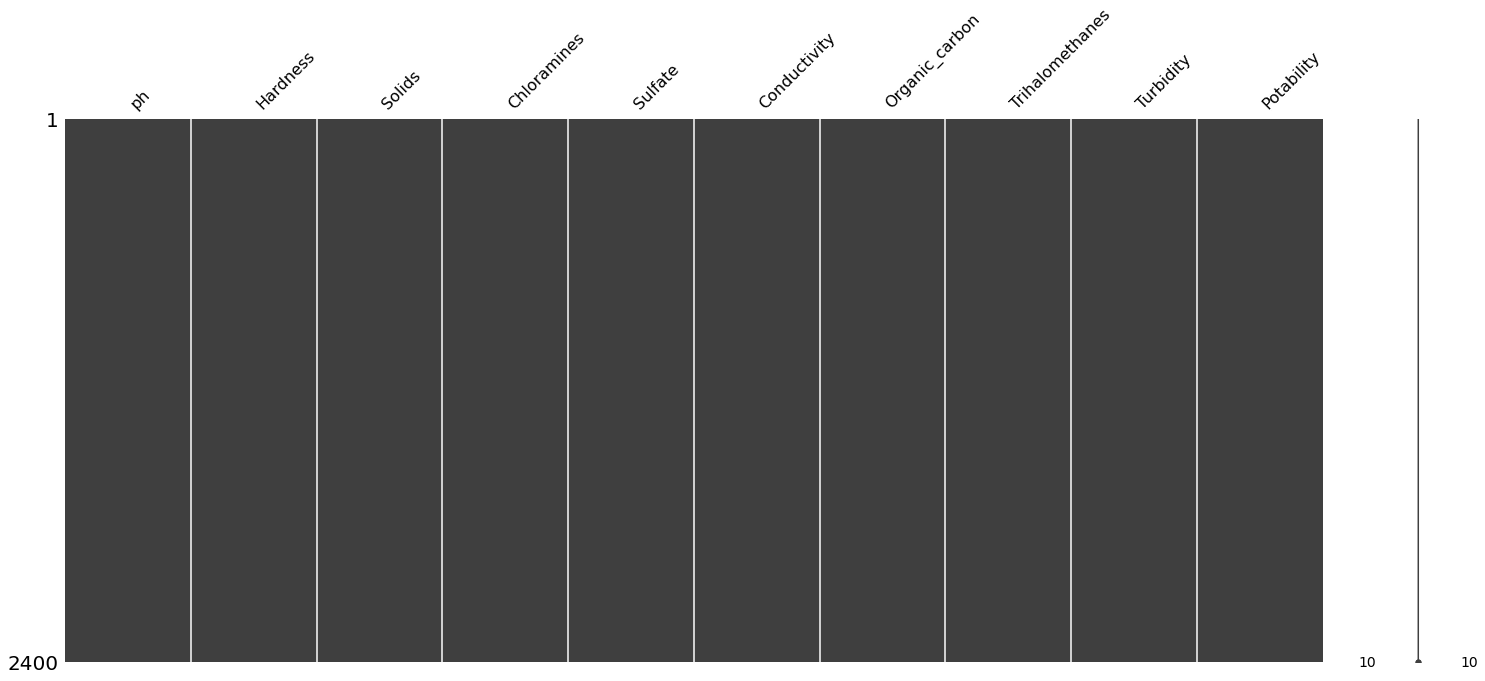

In [ ]:
msn.matrix(df)

Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

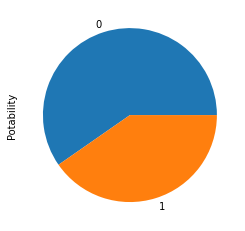

In [ ]:
# generar grafica de proporcion de clases
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

Utilizaremos la función `resample` de SciKit-Learn para remuestrear algunas muestras entre la clase '1'.

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# observaciones de cada clase de y target
zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1 (clase minoritaria)

# generar base con nuevas observaciones de resampleo de clase minoritaria a agregar a la base de datos
df_minority_upsampled = resample(one, replace = True, n_samples = 1200)

# concatenar observaciones(filas) de la clase 0 y la clae 1 con resampleo
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

# nueva base con muestras resampleadas de la clase minoritaria 1
df_minority_upsampled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2031,6.746935,154.332162,25137.427677,8.495904,274.884089,330.083723,15.983632,69.943254,3.485536,1
3214,5.500277,263.683160,19911.224900,4.755312,366.942743,435.865696,12.761184,51.439894,5.147536,1
2429,6.438422,202.537835,26448.245087,5.775933,322.451774,567.201675,12.641968,55.701067,3.380360,1
1133,7.890354,180.158098,32160.533923,7.773484,360.283983,344.550619,11.246460,60.292187,3.209588,1
3230,8.659113,114.807578,23514.636647,8.735315,333.027205,318.640679,16.559076,52.866373,2.895774,1
...,...,...,...,...,...,...,...,...,...,...
2384,6.884981,138.440111,14893.206396,9.686435,319.134991,286.921558,14.184036,54.559077,4.584319,1
711,7.688786,209.185625,29568.535852,9.817336,294.347732,355.698613,13.918769,71.681540,3.918673,1
660,7.543931,192.234541,24227.961139,7.241343,336.151050,369.427699,18.188873,70.588507,3.703191,1
2836,7.833361,249.340053,13394.731607,8.341670,393.137872,443.629123,10.983344,76.645734,4.270973,1


<AxesSubplot:ylabel='Potability'>

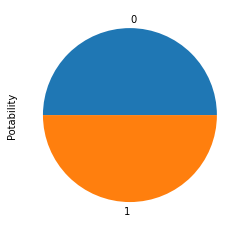

In [ ]:
# pie plot para ver proporcion de clases balanceada
df['Potability'].value_counts().plot(kind='pie')

In [ ]:
# generar X predictores/variables, y target
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2719,9.038326,227.357659,34353.839725,5.573277,231.053687,421.664482,16.331421,92.643383,3.706266
3225,8.468741,132.456484,21038.442613,8.001378,345.000735,360.575586,10.742960,64.508934,2.876996
2881,5.349997,193.808121,31795.625606,8.217819,327.233388,431.476040,11.776193,55.816510,3.838721
2325,5.685216,154.570002,17628.043059,6.664444,390.094731,324.427772,17.352586,67.407300,4.066157
437,9.462666,225.399307,12224.624604,2.981379,387.098720,485.697274,13.204394,62.297699,2.850184
...,...,...,...,...,...,...,...,...,...
2383,5.153489,107.341982,19115.721861,9.296114,333.061939,457.891532,17.445656,77.598804,3.749921
1928,7.425102,204.486282,18608.940874,7.434493,318.183297,338.935271,16.244755,94.605311,2.558773
2712,6.418203,173.446214,19617.308494,7.396472,321.865250,391.667466,18.453951,46.345864,2.670977
47,10.682966,173.375498,15758.740621,5.570784,307.352586,323.807913,10.090870,78.472784,3.999775


## Parte 1: Prueba de Modelos y GridSearch/RandomizedSearch

A continuación, realizaremos un procedimiento de búsqueda del mejor modelo y sus correspondientes hiperparámetros. Estos procedimientos se conocen como GridSearch/RandomizedSearch. Puede encontrar más información en los siguientes enlaces:

- [GridSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)
- [Medium Article: GridSearch & RandomizedSearch](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, f1_score 
from sklearn.metrics import make_scorer, plot_confusion_matrix, confusion_matrix 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report

Partición de datos de prueba/entrenamiento.

In [ ]:
# dividir base en train-set y test-set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3243,6.125810,241.443535,8810.895810,5.740321,369.022715,367.967943,16.816507,47.661727,4.953058
2043,7.128062,191.400821,25227.545153,6.607844,319.250859,419.304980,12.865366,78.468491,4.510595
2006,6.538207,214.992866,12330.406568,7.300092,389.817036,465.352665,22.089402,24.532773,3.426266
1515,7.330197,159.803720,14884.339958,9.194575,411.100692,404.195912,17.375739,51.153972,2.884715
546,3.410360,207.397473,49074.730407,5.667433,301.975011,351.520393,15.987370,86.639186,3.721766
...,...,...,...,...,...,...,...,...,...
142,6.825468,187.051710,46140.126850,6.137757,352.702182,373.427235,12.606382,58.752201,3.027450
1473,6.394980,220.422389,21051.256907,8.739505,348.047760,353.365418,19.637042,48.709989,4.732003
637,6.576845,156.221768,12772.095750,9.759898,341.749378,418.972467,10.382253,78.305180,3.771314
1087,7.156424,197.993538,27025.206963,6.734527,359.710517,448.457161,12.511973,49.299849,2.958415


## Parte 1A

### Definición de Parámetros de GridSearch/RandomizedSearch

Basado en la documentación de las funciones, defina los siguientes parámetros para los casos:

- GridSearch:
    - Árbol de Decisión (GridSearch):
        - 'criterion': 'gini' y 'entropy'
        - 'max_depth': vector de valores enteros entre 1 y 50
        - 'min_samples_leaf': 10 valores seleccionados por usted entre 1 y 100
    
    - Random Forest (GridSearch):
        - 'n_estimators': 4 valores seleccionados por usted entre 100 y 500
        - 'min_samples_leaf': 3 valores seleccionados por usted entre 2 y 30
        
    - AdaBoost (GridSearch):
        - 'n_estimators': 6 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
        
    - XGBoost (RandomizedSearch):
        - 'n_estimators': 8 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
    

In [ ]:
# crear escalador MinMaxScaler() sobre los predictores X para train-set y test-set
scaler = RobustScaler() # Utilice un MinMaxScaler #
X_train_scaled = scaler.fit_transform(X_train) # Aplique el Escalamiento (función fit_transform) # 
X_test_scaled =  scaler.transform(X_test) # Aplique el Escalamiento (función fit_transform) #

X_test_scaled

array([[-1.55037589e-01,  2.91592405e-02,  4.30710491e-01, ...,
         9.39370511e-01,  1.35465685e-01,  1.75021761e-01],
       [-8.32311917e-01,  4.34485644e-02, -1.02921822e-01, ...,
         9.73535311e-02,  6.76723171e-01, -9.19929648e-01],
       [-5.53370092e-01,  1.30800163e+00, -5.50145090e-01, ...,
         3.87191150e-01, -6.64390005e-03,  3.08655350e-01],
       ...,
       [-1.92340296e-01, -5.85353040e-01,  1.19936447e+00, ...,
         3.74101468e-01,  6.28515377e-02,  8.37158362e-01],
       [-2.06359970e-01, -2.07585116e+00,  4.15641633e-01, ...,
         1.15339585e+00,  9.31061965e-01,  2.08506205e-01],
       [-7.49920168e-02, -1.42954552e+00, -5.40089543e-01, ...,
         2.05947038e-03, -5.91310354e-01,  5.70610261e-01]])

In [ ]:
# Búsqueda de Hiperparámetros
# crear modelo de ML de ensamble
lr = LogisticRegression(n_jobs=-1, random_state=100)

dt = DecisionTreeClassifier(splitter='best', random_state=100)

#  max_depth = 7
rf = RandomForestClassifier(n_jobs=-1, max_features = 3, verbose = 1, random_state=100)

ada = AdaBoostClassifier(random_state=100)

xgb = XGBClassifier(max_depth = 7, verbosity=3, random_state=100)


#Regresión Logística
para_lr = { 'penalty': ['l1','l2','elasticnet'], 'C':np.linspace(0.01,50,num=20,dtype=float) }
grid_lr = GridSearchCV(lr, param_grid=para_lr, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#Árbol de Decisión
para_dt = { 'criterion': ['gini','entropy'], 
           'max_depth': np.linspace(1,50,num=20,dtype=int), 
           'min_samples_split': np.linspace(9,20,num=5,dtype=int), 
           'min_samples_leaf': np.linspace(1,100,num=10,dtype=int)}
grid_dt = GridSearchCV(dt, param_grid=para_dt, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#Random Forest
# hiperparametros 
params_rf = {'n_estimators':np.linspace(100,500,num=4,dtype=int),
             'criterion':['gini','entropy'], 
             'max_depth': [7, 8, 10, 13, 15],  
             'min_samples_leaf':np.linspace(2,30,num=3,dtype=int), 
             'max_features':[3,6,9], 
             'oob_score':[True,False] }
grid_rf = GridSearchCV(rf, param_grid=params_rf, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#AdaBoost
params_ada = {'n_estimators':np.linspace(50,600,num=6,dtype=int), 
              'learning_rate':np.linspace(0.01,1,num=5,dtype=float) }
grid_ada =  GridSearchCV(ada, param_grid=params_ada, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#XGBoost
params_xgb = {'n_estimators':np.linspace(50,600,num=8,dtype=int), 
              'learning_rate':np.linspace(0.01,1,num=5,dtype=float), 
              'booster':['gbtree','dart']}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

rs_xgb

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=100, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'learning_rate': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]),
                                        'n_estimators': array([ 50, 128, 207, 285, 364, 442, 521, 600])},
                   scoring=make_scorer(recall_score, pos_label=0), verbose=3)

### Búsqueda de Hiperparámetros

A continuación se debe realizar el proceso de GridSearch. Esta operación puede tardar.

In [ ]:
# ajustar/entrenar los optimizador de hiperparametros GridSearchCV de cada modelo
grid_lr.fit(X_train_scaled, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueE

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:28:11] DEBUG: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:156: Using tree method: 2
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=7
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=7
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autosca

[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=7
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=7
[23:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:11] I

[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=7
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=7
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:12] I

[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=7
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=7
[23:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:12] I

[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=7
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=7
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:13] I

[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=7
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=7
[23:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:13] I

[23:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=7
[23:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=7
[23:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:14] I

[23:28:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[23:28:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=7
[23:28:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:15] I

[23:28:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=7
[23:28:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=7
[23:28:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nod

[23:28:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=7
[23:28:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=7
[23:28:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:17] I

[23:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=7
[23:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=7
[23:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nod

[23:28:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=7
[23:28:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[23:28:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:19] I

[23:28:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=7
[23:28:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[23:28:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nod

[23:28:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[23:28:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=7
[23:28:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nod

[23:28:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=7
[23:28:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[23:28:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra no

[23:28:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[23:28:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[23:28:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:25] I

[23:28:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[23:28:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=7
[23:28:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nod

[23:28:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=7
[23:28:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=7
[23:28:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra no

[23:28:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[23:28:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=7
[23:28:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:30] I

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=100, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'learning_rate': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]),
                                        'n_estimators': array([ 50, 128, 207, 285, 364, 442, 521, 600])},
                   scoring=make_scorer(recall_score, pos_label=0), verbose=3)

In [ ]:
# retornar los mejores modelos de la sintonización con GridSearchCV
grid_lr.best_estimator_

LogisticRegression(C=0.01, n_jobs=-1, random_state=100)

In [ ]:
###Resultados de optimizador de hiperparámetros GridSearchCV/RandomizedSearch
# retornar los resultados de la K-Fold (cv=5) sobre los datos de entrenamientot
grid_lr.cv_results_

# print los mejores hiper parametros de cada modelo
print("Mejores parámetros Regresión Logistica:", grid_lr.best_params_)
print("Mejores parámetros Árbol de Decisión:", grid_dt.best_params_)
print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejores parámetros AdaBoost:", grid_ada.best_params_)
print("Mejores parámetros XGBoost:", rs_xgb.best_params_)
print('')

# mejores modelos obtenidos por sintonización mediante GridSearchCV y Randomized Search para cada modelo
lr_op = grid_lr.best_estimator_
dt_op = grid_dt.best_estimator_
rf_op = grid_rf.best_estimator_
ada_op = grid_ada.best_estimator_
xgb_op = rs_xgb.best_estimator_

# calcular el promedio de la métrica de evaluación a maximizar 
mean_lr_spec = grid_lr.best_score_
mean_dt_spec = grid_dt.best_score_
mean_rf_spec = grid_rf.best_score_
mean_ada_spec = grid_ada.best_score_
mean_xgb_spec = rs_xgb.best_score_

# print los mejores hiper parametros de cada modelo
print("Mejores score de Promedio K-Fold Regresión Logistica:", mean_lr_spec)
print("Mejores score de Promedio K-Fold Árbol de Decisión:", mean_dt_spec )
print("Mejores score de Promedio K-Fold Random Forest:", mean_rf_spec)
print("Mejores score de Promedio K-Fold AdaBoost:", mean_ada_spec)
print("Mejores score de Promedio K-Fold XGBoost:", mean_xgb_spec)



Mejores parámetros Regresión Logistica: {'C': 0.01, 'penalty': 'l2'}
Mejores parámetros Árbol de Decisión: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 17}
Mejores parámetros Random Forest: {'criterion': 'gini', 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 233, 'oob_score': True}
Mejores parámetros AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Mejores parámetros XGBoost: {'n_estimators': 442, 'learning_rate': 0.01, 'booster': 'dart'}

Mejores score de Promedio K-Fold Regresión Logistica: 0.6162357916997092
Mejores score de Promedio K-Fold Árbol de Decisión: 0.9536716891356066
Mejores score de Promedio K-Fold Random Forest: 0.8353528945281523
Mejores score de Promedio K-Fold AdaBoost: 0.9362305048902988
Mejores score de Promedio K-Fold XGBoost: 0.7612582606397039


In [ ]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 17}

## Parte 1B

### Boosting & Bagging

Para este caso utilice 100 clasificadores de Árbol de Decisión con los mejores parámetros obtenidos a partir del GridSearch realizado anteriormente.

In [ ]:
####Bagging
# crear modelo de Bagging ( arboles de decision ajustados/fit con bootstrap)
bagging = BaggingClassifier(n_estimators = 100, n_jobs=-1, random_state= 100, verbose = 3)

#XGBoost
# crear GridSearchCV de hiperparametros
params_bagg = {'oob_score':[True,False]}
grid_bagg =  GridSearchCV(bagging, param_grid=params_bagg, scoring= make_scorer(recall_score,pos_label=0), cv=5)

# ajustar/entrenar optimizar de hiper parametros con datos de entrenamiento
grid_bagg.fit(X_train, y_train)

# print los mejores hiper parametros de modelo
print("Mejores parámetros Bagging Classifier:", grid_bagg.best_params_)

# contruir el mejor modelo obtenido de GridSearchCV
bagg_op = grid_bagg.best_estimator_

# calcular el promedio de la métrica de evaluación a maximizar 
mean_bagg_spec = grid_bagg.best_score_

# print los mejores hiper parametros de cada modelo
print("Mejores score de Promedio K-Fold Bagging Classifier:", mean_bagg_spec)

bagg_op

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent wo

Mejores parámetros Bagging Classifier: {'oob_score': True}
Mejores score de Promedio K-Fold Bagging Classifier: 0.8106687813904309


[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


BaggingClassifier(n_estimators=100, n_jobs=-1, oob_score=True, random_state=100,
                  verbose=3)

### Métricas de Evaluación

A continuación podrá observar un resumen con las precisiones de cada modelo y posteriormente su representación gráfica.

In [ ]:
classifiers = [('Regresión Logística', lr_op),
               ('Árbol de Decisión', dt_op), ('Random Forest', rf_op), ('AdaBoost', ada_op),
               ('Bagging', bagg_op), ('XGBoost', xgb_op)]

classifiers

[('Regresión Logística',
  LogisticRegression(C=0.01, n_jobs=-1, random_state=100)),
 ('Árbol de Decisión',
  DecisionTreeClassifier(max_depth=3, min_samples_split=17, random_state=100)),
 ('Random Forest',
  RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=2,
                         n_estimators=233, n_jobs=-1, oob_score=True,
                         random_state=100, verbose=1)),
 ('AdaBoost', AdaBoostClassifier(learning_rate=0.01, random_state=100)),
 ('Bagging',
  BaggingClassifier(n_estimators=100, n_jobs=-1, oob_score=True, random_state=100,
                    verbose=3)),
 ('XGBoost',
  XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_c

     0    1
0  138   90
1  145  107

Regresión Logística : 0.61
Regresión Logística : 0.51
Regresión Logística : 0.42
Regresión Logística : 0.54
Regresión Logística : 0.48
     0   1
0  220   8
1  219  33

Árbol de Decisión : 0.96
Árbol de Decisión : 0.53
Árbol de Decisión : 0.13
Árbol de Decisión : 0.80
Árbol de Decisión : 0.23


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 233 out of 233 | elapsed:    0.0s finished


     0    1
0  194   34
1   41  211

Random Forest : 0.85
Random Forest : 0.84
Random Forest : 0.84
Random Forest : 0.86
Random Forest : 0.85
     0   1
0  215  13
1  220  32

AdaBoost : 0.94
AdaBoost : 0.51
AdaBoost : 0.13
AdaBoost : 0.71
AdaBoost : 0.22


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


     0    1
0  191   37
1   40  212

Bagging : 0.84
Bagging : 0.84
Bagging : 0.84
Bagging : 0.85
Bagging : 0.85
[23:28:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=7
[23:28:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=7
[23:28:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-gro

[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=7
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=7
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] I

[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=7
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=7
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] I

[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=7
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=7
[23:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:38] I

[23:28:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=7
[23:28:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=7
[23:28:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:39] I

[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=7
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=7
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:40] 

[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=7
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=7
[23:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:40] I

[23:28:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=7
[23:28:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=7
[23:28:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:41] I

[23:28:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=7
[23:28:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[23:28:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:42] I

[23:28:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=7
[23:28:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=7
[23:28:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:43] I

[23:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=7
[23:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=7
[23:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra no

[23:28:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=7
[23:28:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[23:28:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:45] I

[23:28:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=7
[23:28:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=7
[23:28:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nod

[23:28:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[23:28:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=7
[23:28:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nod

[23:28:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=7
[23:28:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=7
[23:28:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:49] I

[23:28:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=7
[23:28:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[23:28:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nod

[23:28:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=7
[23:28:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=7
[23:28:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra no

[23:28:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=7
[23:28:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=7
[23:28:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra no

[23:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=7
[23:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=7
[23:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:908: drop 0 trees, weight = 1
[23:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra no

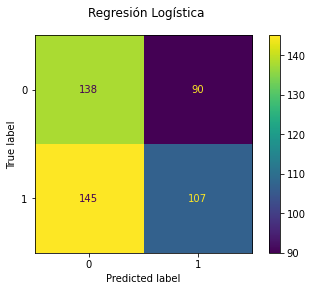

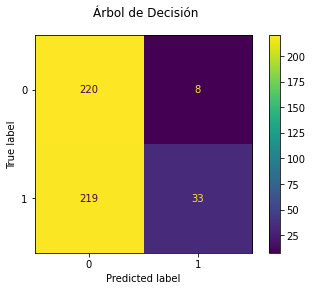

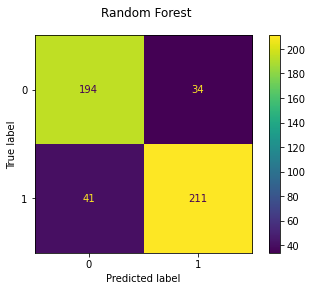

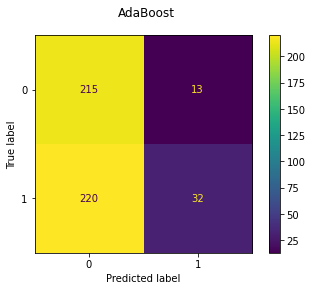

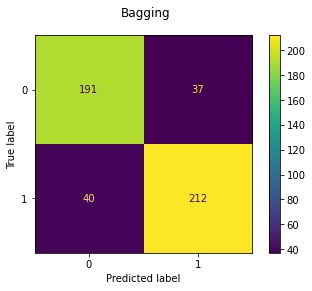

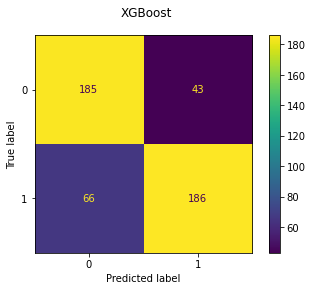

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, f1_score 

# crear lista de nombres
classifier_names = []

# crear listas de métricas de evaluacion
classifier_spec = []# spec = 1-FPR

classifier_acc = []# (TP+TN)/TOT
classifier_rec = []# rec = 1-FNR
classifier_prec= []# prec = 1-FDR
classifier_f1 = []# media armonica entre prec y rec

for classifier_name, classifier in classifiers:
 
    # ajustar modelo sintonizado con datos de entrenamiento
    classifier.fit(X_train, y_train)    
    
    # crear y_predict vector de predicciones
    y_predict = classifier.predict(X_test)
    
    # calcular matriz de confusion
    print(pd.DataFrame(confusion_matrix(y_test, y_predict)))
    print('')
    confusion = confusion_matrix(y_test, y_predict)    
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict ).ravel()
    spec = tn / (tn+fp)
    
    disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
    modelo = classifier_name
    disp.figure_.suptitle(classifier_name)
    
    # calcular scoring = 'specificity'
    specificity = specificity1 = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    
    
    
    # calcular métricas de evaluación
    accuracy = accuracy_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    f1 = f1_score(y_test,y_predict)
    
    
    # Evaluación del clasificador
    print('{:s} : {:.2f}'.format(classifier_name, specificity))
    classifier_names.append(classifier_name)
    classifier_spec.append(specificity)
    
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_acc.append(accuracy)
    
    print('{:s} : {:.2f}'.format(classifier_name, recall))
    classifier_rec.append(recall)
    
    print('{:s} : {:.2f}'.format(classifier_name, precision))
    classifier_prec.append(precision)
    
    print('{:s} : {:.2f}'.format(classifier_name, f1))
    classifier_f1.append(f1)
    
    
    

# Resultados Preliminares

Text(0.5, 1.0, 'Especificidad')

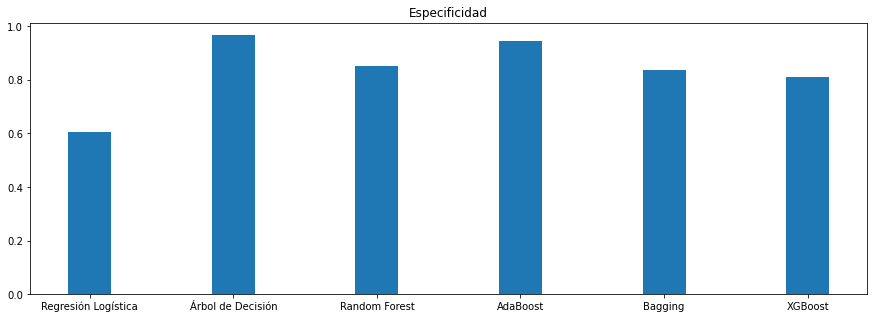

In [ ]:
# Specificity= 1-FPR
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_spec, width=0.3)
plt.title('Especificidad')

In [ ]:
print('Clasificador: ',  classifier_names, 'Especificidad',classifier_spec )

Clasificador:  ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'AdaBoost', 'Bagging', 'XGBoost'] Especificidad [0.6052631578947368, 0.9649122807017544, 0.8508771929824561, 0.9429824561403509, 0.8377192982456141, 0.8114035087719298]


Text(0.5, 1.0, 'Accuracy')

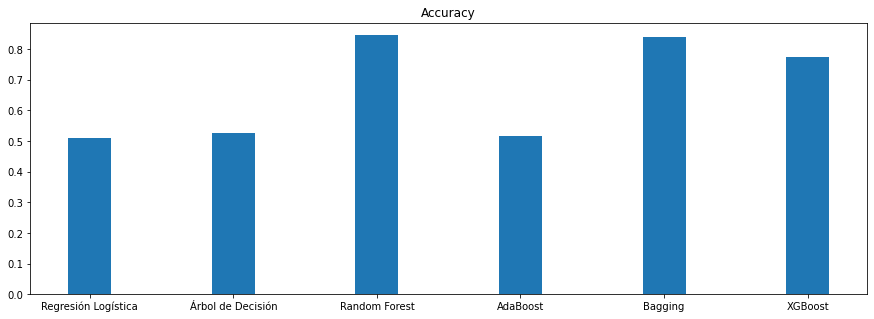

In [ ]:
# Accuracy
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_acc, width=0.3)
plt.title('Accuracy')

Text(0.5, 1.0, 'Sensitividad')

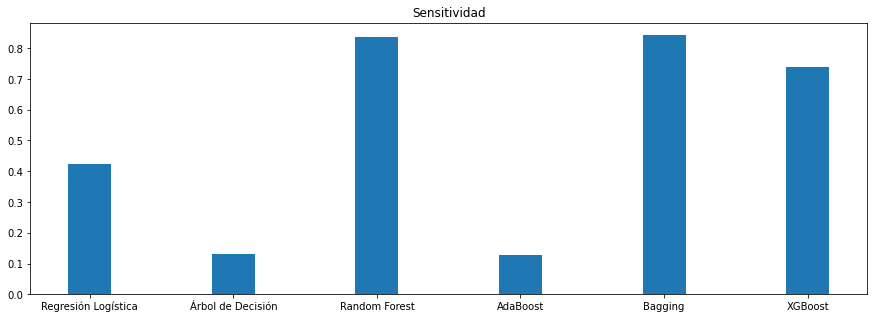

In [ ]:
# Recall/Sensitivity= 1-FNR
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_rec, width=0.3)
plt.title('Sensitividad')

Text(0.5, 1.0, 'Precision')

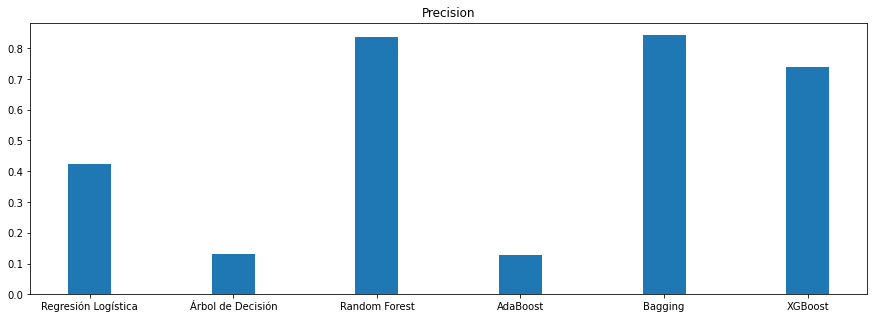

In [ ]:
# Precision = 1-FDR
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_rec, width=0.3)
plt.title('Precision')

Text(0.5, 1.0, 'F1 Score')

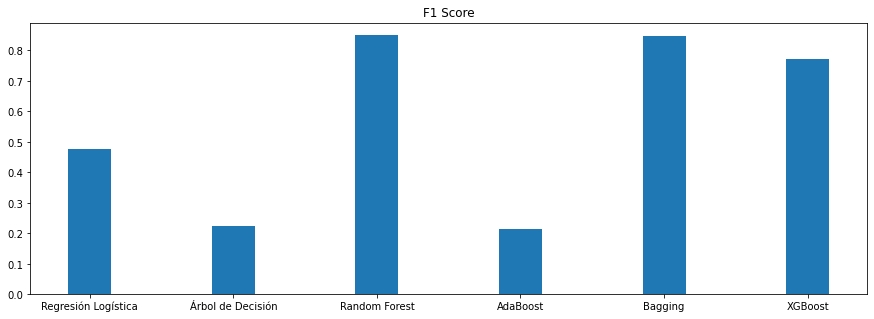

In [ ]:
# F1 = H. Mean Balance entre precision y recall/sensitividad 
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_f1, width=0.3)
plt.title('F1 Score')

## Parte 2

### Análisis de Resultados

Ahora usted utilizará la función `classication_report` para determinar qué clasificador se ajusta más a los resultados buscados, teniendo en cuenta el contexto del problema y la simplicidad de cada modelo.

### Random Forest

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf= rf_op.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       228
           1       0.86      0.84      0.85       252

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 233 out of 233 | elapsed:    0.0s finished


### Árbol de Decisión

In [ ]:
y_pred_dt = dt_op.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.96      0.66       228
           1       0.80      0.13      0.23       252

    accuracy                           0.53       480
   macro avg       0.65      0.55      0.44       480
weighted avg       0.66      0.53      0.43       480



### XGBoost

In [ ]:
y_pred_xgb = xgb_op.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       228
           1       0.81      0.74      0.77       252

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.78      0.77      0.77       480



### Bagging de Árboles de Decisión

In [ ]:
y_pred_bagging = bagg_op.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       228
           1       0.85      0.84      0.85       252

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


### Regresión logística

In [ ]:
from sklearn.metrics import classification_report
y_pred_lr= lr_op.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       228
           1       0.53      0.50      0.52       252

    accuracy                           0.51       480
   macro avg       0.51      0.51      0.51       480
weighted avg       0.51      0.51      0.51       480



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
